In [1]:
from importlib import reload
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from cartopy import crs as ccrs
import seaborn as sns

import xarray

from remote_sensing.download import podaac
from remote_sensing.healpix import rs_healpix
from remote_sensing.netcdf import utils as nc_utils
from remote_sensing.plotting import utils as putils

# Grab a VIIRS image

In [10]:
# Get recent AMSR2 data
files, checksums = podaac.grab_file_list(
    'VIIRS_NPP-STAR-L2P-v2.80',
    dt_past={'hours': 3}
)
files

['https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/VIIRS_NPP-STAR-L2P-v2.80/20250305131000-STAR-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.80-v02.0-fv01.0.nc',
 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/VIIRS_NPP-STAR-L2P-v2.80/20250305130000-STAR-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.80-v02.0-fv01.0.nc',
 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/VIIRS_NPP-STAR-L2P-v2.80/20250305125000-STAR-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.80-v02.0-fv01.0.nc',
 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/VIIRS_NPP-STAR-L2P-v2.80/20250305124000-STAR-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.80-v02.0-fv01.0.nc']

In [13]:
# Download the files
local_files = podaac.download_files(files)

Using default download directory: ./PODAAC
File exists: 20250305131000-STAR-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.80-v02.0-fv01.0.nc
  --- Use clobber=True to overwrite
File exists: 20250305130000-STAR-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.80-v02.0-fv01.0.nc
  --- Use clobber=True to overwrite
File exists: 20250305125000-STAR-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.80-v02.0-fv01.0.nc
  --- Use clobber=True to overwrite
File exists: 20250305124000-STAR-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.80-v02.0-fv01.0.nc
  --- Use clobber=True to overwrite
Downloaded 0 files, failed on 0 files, skipped 4 existing files.


In [14]:
local_files[0]

'./PODAAC/VIIRS_NPP-STAR-L2P-v2.80/20250305131000-STAR-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.80-v02.0-fv01.0.nc'

# View one

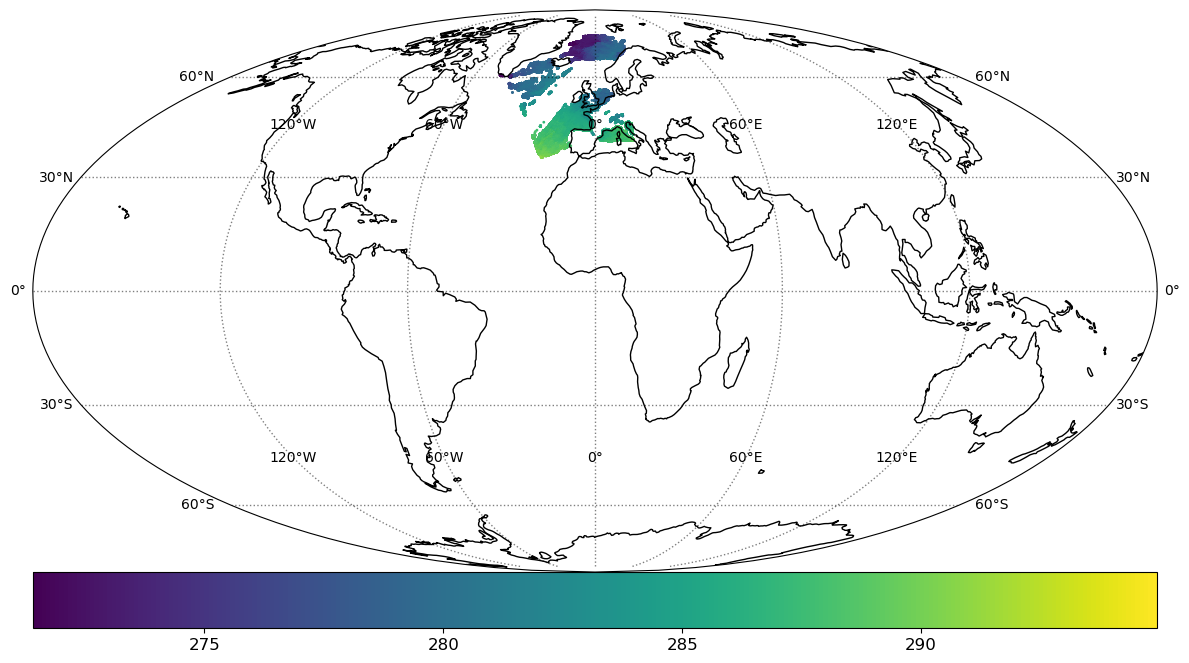

In [2]:
reload(putils)
local_file = './PODAAC/VIIRS_NPP-STAR-L2P-v2.80/20250305131000-STAR-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.80-v02.0-fv01.0.nc'
putils.show_one(local_file, 'sst')

In [3]:
ds = xarray.open_dataset(local_file)

In [4]:
ds

<xarray.Dataset> Size: 1GB
Dimensions:                  (time: 1, nj: 5392, ni: 3200)
Coordinates:
  * time                     (time) datetime64[ns] 8B 2025-03-05T13:10:01
    lat                      (nj, ni) float32 69MB ...
    lon                      (nj, ni) float32 69MB ...
Dimensions without coordinates: nj, ni
Data variables:
    sst_dtime                (time, nj, ni) timedelta64[ns] 138MB ...
    dt_analysis              (time, nj, ni) float32 69MB ...
    satellite_zenith_angle   (time, nj, ni) float32 69MB ...
    sea_surface_temperature  (time, nj, ni) float32 69MB ...
    sses_bias                (time, nj, ni) float32 69MB ...
    sses_standard_deviation  (time, nj, ni) float32 69MB ...
    sea_ice_fraction         (time, nj, ni) float32 69MB ...
    l2p_flags                (time, nj, ni) int16 35MB ...
    quality_level            (time, nj, ni) float32 69MB ...
    wind_speed               (time, nj, ni) float32 69MB ...
    sst_gradient_magnitude   (time, nj, ni) float32 69MB ...
    sst_front_position       (time, nj, ni) float32 69MB ...
Attributes: (12/59)
    geospatial_bounds:                        POLYGON((  22.496  74.548,   14...
    geospatial_first_scanline_first_fov_lat:  40.542038
    geospatial_first_scanline_first_fov_lon:  14.661322
    geospatial_first_scanline_last_fov_lat:   35.30782
    geospatial_first_scanline_last_fov_lon:   -19.945404
    geospatial_last_scanline_first_fov_lat:   74.54813
    ...                                       ...
    time_coverage_end:                        20250305T131959Z
    time_coverage_start:                      20250305T131000Z
    title:                                    VIIRS L2P SST
    uuid:                                     0d4ff9f0-f9cd-11ef-9472-246e961...
    westernmost_longitude:                    -55.46044
    netcdf_version_id:                        4.7.4 of Nov 18 2021 15:43:53 $